# Exercise 12.1

In exercise 11.3, you created a CSV file named 'prices_of_coffee_over_time.csv', containing data about the average price of a pound of coffee on a range of dates. Use this CSV file to create a line chart which visualises the development of these prices over time. 

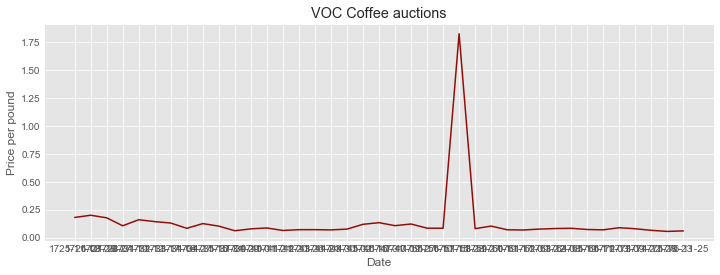

In [147]:
import pandas as pd

df = pd.read_csv('prices_of_coffee_over_time.csv')

%matplotlib inline

import matplotlib.pyplot as plt


plt.style.use('ggplot')

fig = plt.figure( figsize = ( 12, 4))
ax = plt.axes()

ax.plot( df['date'] , df['price_per_pound'] , color = '#930d08' , linestyle = 'solid')

ax.set_xlabel('Date')
ax.set_ylabel('Price per pound')


ax.set_title( 'VOC Coffee auctions')

plt.show()

# Exercise 12.2

Download the following data set:

https://edu.nl/bcm4x

This file contains data collected for the [2018 Better Life Index](https://stats.oecd.org/index.aspx?DataSetCode=BLI), which was created by the OECD to visuale some of the key factors  that contribute to well-being in OECD countries, including education, income, housing and environment.

Using this data set, create a bar chart which can be used to compare either the 'personal_earnings' or the 'life_satisfaction' in OECD countries. 

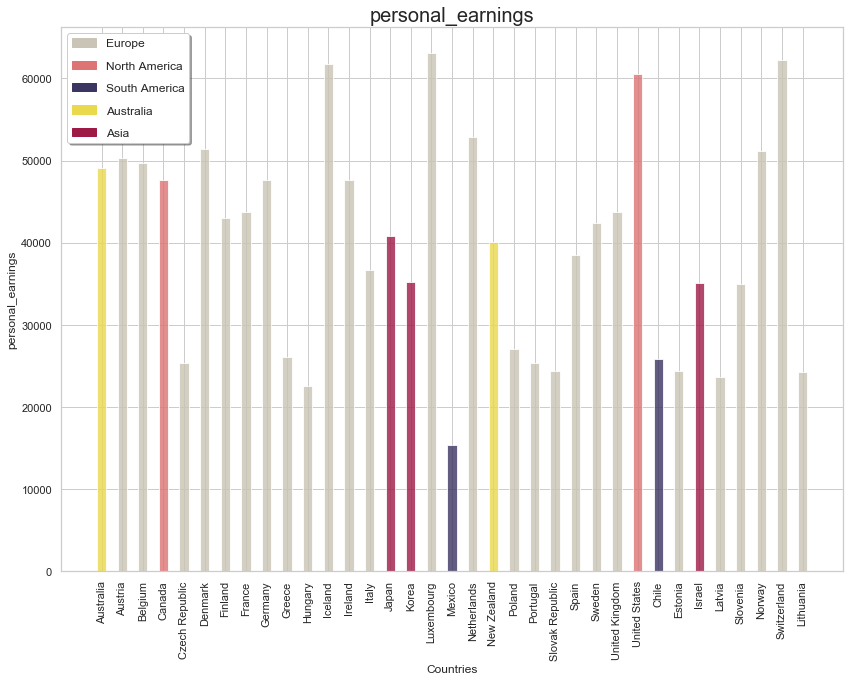

In [59]:
import pandas as pd

df = pd.read_csv('bli.csv')
df = df.dropna(subset = [ 'personal_earnings' ])


colours = [ '#c9c4b5' , '#DD7373' ,   '#3B3561' , '#EAD94C' , '#9E1946' , '#51A3A3']
classColours = dict()

unique_categories = list( set( df['continent'] ) )
if len( unique_categories ) <= len(colours):
    for u in range( len( unique_categories ) ):
        classColours[ unique_categories[u] ] = colours[u]
else:
    print("You have more than {} categories. You need to add colours to the list!".format( len(colours) ))

colours = []
for category in df['continent']:
    colours.append( classColours[category] )
    

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

y_axis = 'personal_earnings'


fig = plt.figure( figsize=( 14 , 10 ) )
ax = plt.axes()


bar_width = 0.45
opacity = 0.8

ax.bar( df['country'] , df[y_axis] , width = bar_width, alpha = opacity , color = colours)

plt.xticks(rotation= 90)


patchList = []
for key in classColours:
    data_key = mpatches.Patch(color=classColours[key], label=key)
    patchList.append(data_key)
    
plt.legend(handles=patchList , shadow=True, fontsize='large' , frameon = True )
#plt.ylim(0, 10)

ax.set_xlabel('Countries' , fontsize= 12)
ax.set_ylabel( y_axis , fontsize = 12 )
ax.set_title( y_axis , fontsize=20 )


plt.show()

Using seaborn, the bar chart can be created as follows.

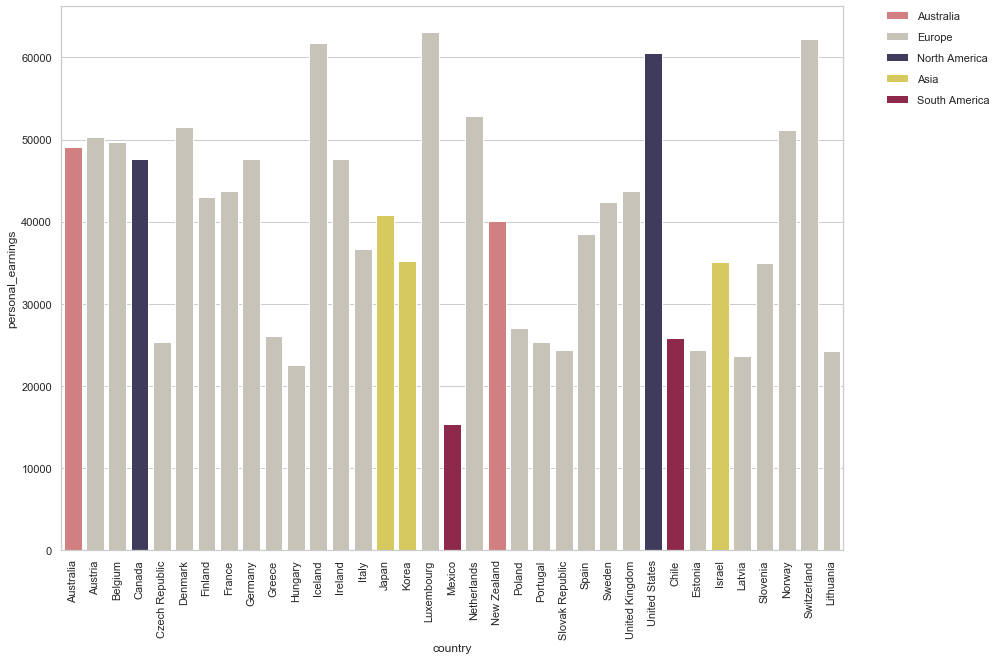

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colours = [ '#DD7373' , '#c9c4b5' , '#3B3561' , '#EAD94C' , '#9E1946'  , '#51A3A3'  ]

## and also adds spacing in between the lines of the legend 
sns.set(style='whitegrid', rc = {'legend.labelspacing': 1})


df = pd.read_csv('bli.csv')
df = df.dropna(subset = [ 'personal_earnings' ])

fig = plt.figure( figsize=( 14 , 10 ) )

ax = sns.barplot( x = 'country' , y= 'personal_earnings' , data =  df , hue = 'continent' , dodge=False , palette = colours )

plt.xticks(rotation= 90)

# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Exercise 12.3

Using the CSV file that you have downloaded for exercise in 12.2 to create a scatter plot. The X-axis must visualise the values in the column 'self-reported_health', and the Y-axis must show the 'employment_rate'. The size of the points must represent the 'educational_attainment' and the colour of the points ust indicate the 'air_pollution'. 

N.B. Names of exiting colour palettes can be found at [https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/](https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/) or at [https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/). Examples include: "Blues", "BuGn", "YlOrRd", "GnBu", "OrRd", "Greens", "Reds".

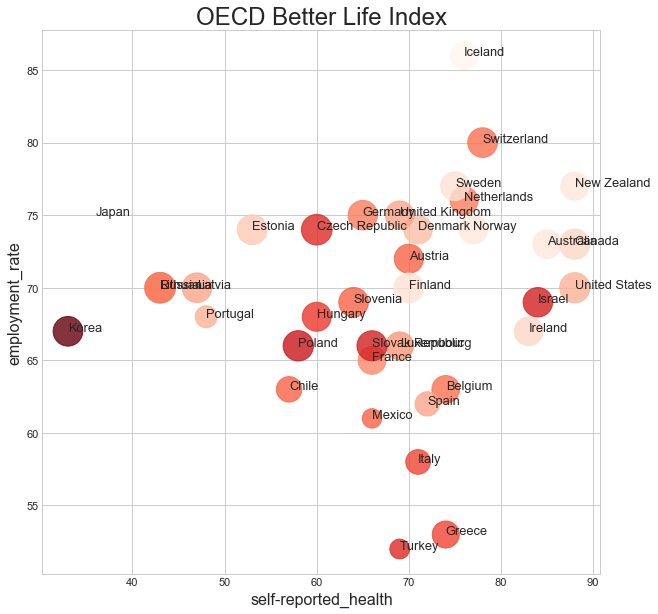

In [54]:
import pandas as pd
df = pd.read_csv('bli.csv')

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

x_axis = 'self-reported_health'
y_axis =  'employment_rate'
point_size =  'educational_attainment'
point_colour =  'air_pollution'


df = df.dropna(subset = [x_axis, y_axis])

#air_pollution,water_quality
fig = plt.figure( figsize = ( 10,10 ))
ax = plt.axes()


scatter = ax.scatter( df[x_axis] , df[y_axis] , alpha=0.8,  s= df[point_size] * 10  , c = df[point_colour] * 10, cmap='Reds' )


for index, row in df.iterrows():
    plt.text( row[x_axis], row[y_axis] , row['country'] , fontsize=12.8)
    

ax.set_xlabel( x_axis  , fontsize = 16 )
ax.set_ylabel( y_axis  , fontsize = 16 )
ax.set_title( 'OECD Better Life Index' , fontsize=24 )


plt.show()

Using seaborn:

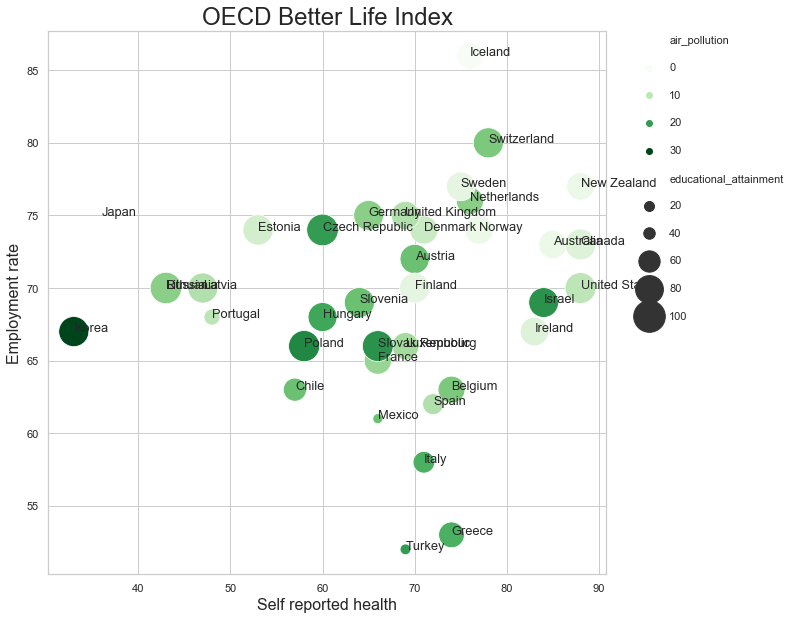

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bli.csv')
df = df.dropna(subset = [x_axis, y_axis])

fig = plt.figure( figsize = ( 10,10 ))

plt.style.use('seaborn-whitegrid')

x_axis = 'self-reported_health'
y_axis =  'employment_rate'
point_size =  'educational_attainment'
point_colour = 'air_pollution' 

## and also adds spacing in between the lines of the legend 
sns.set(style='whitegrid', rc = {'legend.labelspacing': 1.6})


ax = sns.scatterplot(x = x_axis , y = y_axis  , data=df, hue= point_colour , palette="Greens" , size = point_size , sizes=( 100 , 1000) )

for index, row in df.iterrows():
    plt.text( row[x_axis], row[y_axis] , row['country'] , fontsize=12.8)


ax.set_xlabel( 'Self reported health'  , fontsize = 16 )
ax.set_ylabel( 'Employment rate'  , fontsize = 16 )
ax.set_title( 'OECD Better Life Index' , fontsize=24 )



# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
